In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [174]:
scoring = pd.read_csv('scoring.csv')
assists = pd.read_csv('assists.csv')
rebounds = pd.read_csv('rebounds.csv')
turnovers = pd.read_csv('turnovers.csv')
shot = pd.read_csv('shot.csv')

In [175]:
logs = pd.read_csv('gamelogs.csv')

In [176]:
cols = ['Rk', 'G', 'Date', 'Age', 'Opp', 'Unnamed: 7', 'GS', 'MP', 'FG',
        'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 
        'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']
logs = logs[logs['G'].notnull()]
logs = logs[cols]
logs.columns = ['Rk', 'G', 'Date', 'Age', 'Opp', 'W/L', 'GS', 'MP', 'FG',
        'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 
        'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']
logs

,Rk,G,Date,Age,Opp,W/L,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,1,1.0,2019-10-22,21-360,TOR,L (-8),1,24:50,2,7,...,0,5,5,5,0,0,1,2,8,-7
1,2,2.0,2019-10-25,21-363,DAL,L (-7),1,33:13,6,16,...,1,7,8,5,2,0,2,3,15,-14
2,3,3.0,2019-10-26,21-364,HOU,L (-3),1,35:39,6,13,...,0,2,2,10,3,0,0,2,18,0
3,4,4.0,2019-10-28,22-001,GSW,L (-11),1,31:05,4,10,...,1,3,4,9,2,0,2,1,12,-2
4,5,5.0,2019-10-31,22-004,DEN,W (+15),1,31:39,4,7,...,0,3,3,8,1,1,3,2,9,+17
5,6,6.0,2019-11-02,22-006,OKC,L (-11),1,32:31,4,11,...,2,6,8,7,3,0,5,3,10,+4
6,7,7.0,2019-11-04,22-008,BRK,L (-10),1,20:52,6,10,...,1,1,2,3,0,0,2,1,15,-16
7,8,8.0,2019-11-08,22-012,TOR,L (-18),1,22:31,2,8,...,1,3,4,2,2,0,4,0,5,-9
14,15,9.0,2019-11-21,22-025,PHO,W (+3),0,19:27,3,9,...,0,1,1,5,0,0,3,3,8,-11
15,16,10.0,2019-11-23,22-027,UTA,L (-8),0,24:40,5,15,...,2,2,4,4,0,1,2,2,13,+9


In [177]:
def minute_to_int(i):
    i = i.replace(':', '.')
    return float(i)

In [178]:
def win_loss(i):
    if 'L' in i:
        return 0
    else:
        return 1

In [179]:
def plus_min(i):
    if '-' in i:
        return int(i[1:]) * -1
    if '+' in i:
        return int(i[1:])
    return 0

In [180]:
logs['MP'] = logs['MP'].apply(minute_to_int)
logs['W/L'] = logs['W/L'].apply(win_loss)
logs['+/-'] = logs['+/-'].apply(win_loss)
logs['G'] = logs['G'].apply(int)
logs['GS'] = logs['GS'].apply(int)
logs['FG'] = logs['FG'].apply(int)
logs['FGA'] = logs['FGA'].apply(int)
logs['3P'] = logs['3P'].apply(int)
logs['3PA'] = logs['3PA'].apply(int)
logs['FG%'] = logs['FG%'].apply(float)
logs['3P%'] = logs['3P%'].apply(float)
logs['FT%'] = logs['FT%'].apply(float)
logs['FTA'] = logs['FTA'].apply(int)
logs['FT'] = logs['FT'].apply(int)
logs['ORB'] = logs['ORB'].apply(int)
logs['DRB'] = logs['DRB'].apply(int)
logs['TRB'] = logs['TRB'].apply(int)
logs['AST'] = logs['AST'].apply(int)
logs['TOV'] = logs['TOV'].apply(int)
logs['STL'] = logs['STL'].apply(int)
logs['BLK'] = logs['BLK'].apply(int)
logs['PTS'] = logs['PTS'].apply(int)

In [181]:
zion_returns = '2020-01-22'

In [182]:
afterlogs = logs[logs['Date'] >= zion_returns]
beforelogs = logs[logs['Date'] < zion_returns]

In [183]:
stats = ['G', 'W/L', 'GS', 'MP', 'FG',
        'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 
        'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']

In [184]:
after = afterlogs[stats]
before = beforelogs[stats]

In [185]:
for col in after.columns:
    print(col)
    print(np.mean(after[col]))

G
46.5
W/L
0.55
GS
1.0
MP
35.112
FG
4.75
FGA
10.4
FG%
0.44350000000000006
3P
2.85
3PA
6.6
3P%
0.40804999999999997
FT
0.7
FTA
1.05
FT%
0.6355
ORB
1.05
DRB
5.95
TRB
7.0
AST
8.35
STL
1.75
BLK
0.85
TOV
3.65
PF
1.0600611122561151e+18
PTS
13.05
+/-
1.0


In [186]:
for col in before.columns:
    print(col)
    print(np.mean(before[col]))

G
18.5
W/L
0.3611111111111111
GS
0.75
MP
30.64833333333333
FG
4.555555555555555
FGA
11.666666666666666
FG%
0.3875277777777778
3P
2.2777777777777777
3PA
6.416666666666667
3P%
0.3641142857142858
FT
0.6666666666666666
FTA
1.2777777777777777
FT%
0.5043157894736843
ORB
1.1666666666666667
DRB
4.611111111111111
TRB
5.777777777777778
AST
6.25
STL
1.25
BLK
0.3611111111111111
TOV
2.75
PF
6.447863978170092e+33
PTS
12.055555555555555
+/-
1.0


In [190]:
afteras = assists[assists['Date'] >= zion_returns]
beforeas = assists[assists['Date'] < zion_returns]

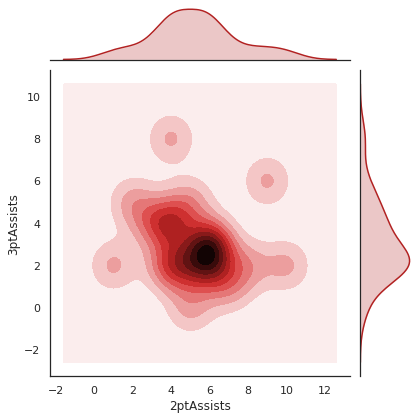

In [199]:
sns.set(style="white", color_codes=True);
#sns.set_context("notebook");
fig = sns.jointplot(x='2ptAssists', y='3ptAssists', data=afteras, kind='kde', color="firebrick")
fig.savefig('afteras')

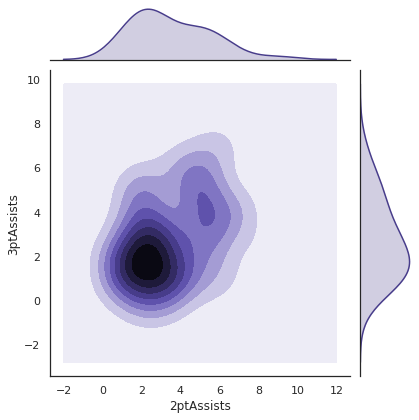

In [200]:
fig = sns.jointplot(x='2ptAssists', y='3ptAssists', data=beforeas, kind='kde', color="darkslateblue")
fig.savefig('beforeas')

In [202]:
zion_returns

'2020-01-22'

In [241]:
reb = logs[['G', 'TRB']]
reb['TRB Cum'] = np.cumsum(list(logs['TRB'].values))
turn = logs[['G', 'TOV']]
turn['TOV Cum'] = np.cumsum(list(logs['TOV'].values))
ast = logs[['G', 'AST']]
ast['AST Cum'] = np.cumsum(list(logs['AST'].values))

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

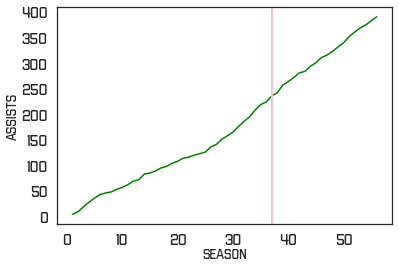

In [240]:
fig = sns.lineplot(x='G', y= 'AST Cum', data=ast, color='green')
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=16);
#plt.ylim(94, 114);
plt.yticks(fontproperties=prop, size=16);
plt.xlabel('Season', fontproperties=prop, size=14);
plt.ylabel('Assists', fontproperties=prop, size=14);
plt.axvline(x=37,linewidth=2, color='pink');
#ax.set_title('Average Points per Game', fontproperties=prop, size=28)
#plt.text(2, y, s, fontsize=12)
#fig.savefig('lebron')

In [245]:
scoring.columns

Index(['Date', 'Team', 'Opponent', 'Minutes', 'OffPoss', 'Points', 'FG2M',
       'FG2A', 'Fg2Pct', 'FG3M', 'FG3A', 'Fg3Pct', 'NonHeaveFg3Pct',
       'FtPoints', 'PtsAssisted2s', 'PtsUnassisted2s', 'PtsAssisted3s',
       'PtsUnassisted3s', 'Assisted2sPct', 'NonPutbacksAssisted2sPct',
       'Assisted3sPct', 'FG3APct', 'ShotQualityAvg', 'EfgPct', 'TsPct',
       'PtsPutbacks', 'Fg2aBlocked', 'FG2APctBlocked', 'Fg3aBlocked',
       'FG3APctBlocked', 'Usage'],
      dtype='object')

In [247]:
scoring.head()

,Date,Team,Opponent,Minutes,OffPoss,Points,FG2M,FG2A,Fg2Pct,FG3M,...,FG3APct,ShotQualityAvg,EfgPct,TsPct,PtsPutbacks,Fg2aBlocked,FG2APctBlocked,Fg3aBlocked,FG3APctBlocked,Usage
0,2020-03-08,NOP,MIN,35:03,84,18,3,5,0.60,4,...,0.615385,0.566654,0.692308,0.692308,0,0,0.000,0,0,21.739130
1,2020-03-06,NOP,MIA,35:50,77,16,3,5,0.60,3,...,0.583333,0.525713,0.625000,0.615385,2,0,0.000,0,0,18.478261
2,2020-03-04,NOP,DAL,39:44,82,25,2,8,0.25,7,...,0.578947,0.503187,0.657895,0.657895,2,1,0.125,0,0,22.105263
3,2020-01-26,NOP,BOS,36:18,77,8,1,1,1.00,2,...,0.900000,0.565465,0.400000,0.400000,0,0,0.000,0,0,13.829787
4,2020-01-24,NOP,DEN,35:30,72,9,0,4,0.00,3,...,0.555556,0.536089,0.500000,0.500000,0,1,0.250,0,0,13.580247


In [254]:
scoring[['PtsAssisted2s', 'PtsAssisted3s']]

,PtsAssisted2s,PtsAssisted3s
0,0,9
1,2,9
2,0,18
3,2,6
4,0,9
5,0,9
6,0,3
7,0,9
8,0,3
9,4,21


In [255]:
assists

,Date,Team,Opponent,Minutes,Assists,AssistPoints,2ptAssists,3ptAssists,AtRimAssists,ShortMidRangeAssists,LongMidRangeAssists,Corner3Assists,Arc3Assists
0,2020-03-08,NOP,MIN,35:03,8,18,6,2,6,0,0,1,1
1,2020-03-06,NOP,MIA,35:50,8,20,4,4,3,1,0,3,1
2,2020-03-04,NOP,DAL,39:44,6,14,4,2,3,1,0,1,1
3,2020-01-26,NOP,BOS,36:18,15,36,9,6,8,0,1,2,4
4,2020-01-24,NOP,DEN,35:30,6,14,4,2,3,0,1,0,2
5,2020-01-22,NOP,SAS,38:57,12,32,4,8,3,1,0,2,6
6,2020-01-20,NOP,MEM,34:25,5,13,2,3,1,0,1,0,3
7,2020-01-18,NOP,LAC,39:10,11,24,9,2,6,1,2,0,2
8,2020-01-16,NOP,UTA,42:07,13,33,6,7,5,0,1,2,5
9,2020-03-03,NOP,MIN,32:51,8,20,4,4,3,0,1,0,4


In [257]:
shot.columns

Index(['Date', 'Team', 'Opponent', 'Minutes', 'ShotQualityAvg',
       'AtRimFG3AFrequency', 'Avg2ptShotDistance', 'Avg3ptShotDistance',
       'AtRimFGM', 'AtRimFGA', 'AtRimFrequency', 'AtRimAccuracy',
       'AtRimPctAssisted', 'ShortMidRangeFGM', 'ShortMidRangeFGA',
       'ShortMidRangeFrequency', 'ShortMidRangeAccuracy',
       'ShortMidRangePctAssisted', 'LongMidRangeFGM', 'LongMidRangeFGA',
       'LongMidRangeFrequency', 'LongMidRangeAccuracy',
       'LongMidRangePctAssisted', 'Corner3FGM', 'Corner3FGA',
       'Corner3Frequency', 'Corner3Accuracy', 'Corner3PctAssisted', 'Arc3FGM',
       'Arc3FGA', 'Arc3Frequency', 'Arc3Accuracy', 'Arc3PctAssisted',
       'NonHeaveArc3FGM', 'NonHeaveArc3FGA', 'NonHeaveArc3Accuracy',
       'HeaveAttempts', 'HeaveMakes'],
      dtype='object')

In [260]:
shot.head(30)

,Date,Team,Opponent,Minutes,ShotQualityAvg,AtRimFG3AFrequency,Avg2ptShotDistance,Avg3ptShotDistance,AtRimFGM,AtRimFGA,...,Arc3FGM,Arc3FGA,Arc3Frequency,Arc3Accuracy,Arc3PctAssisted,NonHeaveArc3FGM,NonHeaveArc3FGA,NonHeaveArc3Accuracy,HeaveAttempts,HeaveMakes
0,2020-03-08,NOP,MIN,35:03,0.566654,0.846154,7.760000,24.687500,3,3,...,3,7,0.538462,0.428571,0.666667,3,7,0.428571,0,0
1,2020-03-06,NOP,MIA,35:50,0.525713,0.833333,7.240000,25.971429,2,3,...,3,7,0.583333,0.428571,1.000000,3,7,0.428571,0,0
2,2020-03-04,NOP,DAL,39:44,0.503187,0.789474,6.700000,25.609091,1,4,...,6,10,0.526316,0.600000,0.833333,6,10,0.600000,0,0
3,2020-01-26,NOP,BOS,36:18,0.565465,1.000000,2.200000,26.044444,1,1,...,2,8,0.800000,0.250000,1.000000,2,8,0.250000,0,0
4,2020-01-24,NOP,DEN,35:30,0.536089,0.777778,9.500000,24.220000,0,2,...,2,2,0.222222,1.000000,1.000000,2,2,1.000000,0,0
5,2020-01-22,NOP,SAS,38:57,0.574000,0.875000,3.350000,25.200000,1,1,...,2,5,0.625000,0.400000,1.000000,2,5,0.400000,0,0
6,2020-01-20,NOP,MEM,34:25,0.599478,0.888889,7.466667,24.950000,0,2,...,2,4,0.444444,0.500000,0.500000,2,4,0.500000,0,0
7,2020-01-18,NOP,LAC,39:10,0.540037,0.812500,7.828571,26.055556,2,4,...,3,8,0.500000,0.375000,0.666667,3,8,0.375000,0,0
8,2020-01-16,NOP,UTA,42:07,0.509271,0.583333,7.585714,25.240000,0,2,...,1,4,0.333333,0.250000,1.000000,1,4,0.250000,0,0
9,2020-03-03,NOP,MIN,32:51,0.547171,0.916667,10.150000,24.870000,1,1,...,4,7,0.583333,0.571429,1.000000,4,7,0.571429,0,0


In [261]:
rebounds

,Date,Team,Opponent,Minutes,Rebounds,DefRebounds,FTDefRebounds,DefFTReboundPct,Def2ptRebounds,Def2ptReboundPct,...,DefAtRimReboundPct,DefShortMidRangeReboundPct,DefLongMidRangeReboundPct,DefArc3ReboundPct,DefCorner3ReboundPct,OffAtRimReboundPct,OffShortMidRangeReboundPct,OffLongMidRangeReboundPct,OffArc3ReboundPct,OffCorner3ReboundPct
0,2020-03-08,NOP,MIN,35:03,5,4,0,0.000000,3,0.115385,...,0.105263,0.000000,0.333333,0.050000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
1,2020-03-06,NOP,MIA,35:50,9,7,2,0.333333,2,0.095238,...,0.100000,0.000000,0.333333,0.272727,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000
2,2020-03-04,NOP,DAL,39:44,11,8,0,0.000000,3,0.200000,...,0.200000,0.125000,0.500000,0.214286,0.285714,0.083333,0.125000,0.000000,0.058824,0.000000
3,2020-01-26,NOP,BOS,36:18,6,4,0,0.000000,2,0.125000,...,0.100000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,0.250000,0.090909,0.000000
4,2020-01-24,NOP,DEN,35:30,4,4,0,0.000000,1,0.040000,...,0.000000,0.111111,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2020-01-22,NOP,SAS,38:57,8,6,0,0.000000,3,0.130435,...,0.250000,0.142857,0.000000,0.300000,0.000000,0.000000,0.111111,0.000000,0.000000,0.200000
6,2020-01-20,NOP,MEM,34:25,9,8,0,0.000000,5,0.192308,...,0.125000,0.214286,0.250000,0.272727,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
7,2020-01-18,NOP,LAC,39:10,10,9,1,0.250000,5,0.208333,...,0.285714,0.111111,0.250000,0.117647,0.500000,0.000000,0.000000,0.000000,0.055556,0.000000
8,2020-01-16,NOP,UTA,42:07,4,4,1,0.333333,2,0.076923,...,0.071429,0.000000,0.200000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2020-03-03,NOP,MIN,32:51,5,4,0,0.000000,1,0.062500,...,0.066667,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000


In [273]:
assists.head()

,Date,Team,Opponent,Minutes,Assists,AssistPoints,2ptAssists,3ptAssists,AtRimAssists,ShortMidRangeAssists,LongMidRangeAssists,Corner3Assists,Arc3Assists,Game
0,2020-03-08,NOP,MIN,35:03,8,18,6,2,6,0,0,1,1,1
1,2020-03-06,NOP,MIA,35:50,8,20,4,4,3,1,0,3,1,2
2,2020-03-04,NOP,DAL,39:44,6,14,4,2,3,1,0,1,1,3
3,2020-01-26,NOP,BOS,36:18,15,36,9,6,8,0,1,2,4,4
4,2020-01-24,NOP,DEN,35:30,6,14,4,2,3,0,1,0,2,5


In [275]:
assists = assists.iloc[::-1]
assists['Game'] = np.arange(1, len(assists) + 1)
assists.head()

,Date,Team,Opponent,Minutes,Assists,AssistPoints,2ptAssists,3ptAssists,AtRimAssists,ShortMidRangeAssists,LongMidRangeAssists,Corner3Assists,Arc3Assists,Game
0,2020-03-08,NOP,MIN,35:03,8,18,6,2,6,0,0,1,1,1
1,2020-03-06,NOP,MIA,35:50,8,20,4,4,3,1,0,3,1,2
2,2020-03-04,NOP,DAL,39:44,6,14,4,2,3,1,0,1,1,3
3,2020-01-26,NOP,BOS,36:18,15,36,9,6,8,0,1,2,4,4
4,2020-01-24,NOP,DEN,35:30,6,14,4,2,3,0,1,0,2,5


In [283]:
ast = assists[['Game', '2ptAssists', '3ptAssists', 'AtRimAssists',
               'ShortMidRangeAssists', 'LongMidRangeAssists', 'Corner3Assists', 'Arc3Assists']]
ast['2pt Cum'] = np.cumsum(list(ast['2ptAssists'].values))
ast['3pt Cum'] = np.cumsum(list(ast['3ptAssists'].values))
ast['Rim Cum'] = np.cumsum(list(ast['AtRimAssists'].values))
ast['Mid Cum'] = np.cumsum(list(ast['ShortMidRangeAssists'].values))
ast['Long Cum'] = np.cumsum(list(ast['LongMidRangeAssists'].values))
ast['Corner Cum'] = np.cumsum(list(ast['Corner3Assists'].values))
ast['Arc Cum'] = np.cumsum(list(ast['Arc3Assists'].values))

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

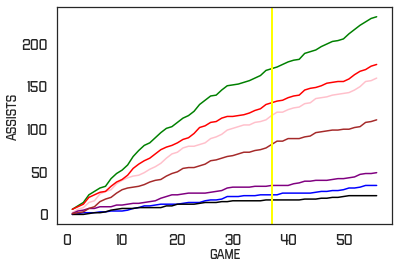

In [284]:
fig = sns.lineplot(x='Game', y= '2pt Cum', data=ast, color='green')
fig = sns.lineplot(x='Game', y= '3pt Cum', data=ast, color='pink')
fig = sns.lineplot(x='Game', y= 'Rim Cum', data=ast, color='red')
fig = sns.lineplot(x='Game', y= 'Mid Cum', data=ast, color='blue')
fig = sns.lineplot(x='Game', y= 'Long Cum', data=ast, color='black')
fig = sns.lineplot(x='Game', y= 'Corner Cum', data=ast, color='purple')
fig = sns.lineplot(x='Game', y= 'Arc Cum', data=ast, color='brown')
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=16);
#plt.ylim(94, 114);
plt.yticks(fontproperties=prop, size=16);
plt.xlabel('Game', fontproperties=prop, size=14);
plt.ylabel('Assists', fontproperties=prop, size=14);
plt.axvline(x=37,linewidth=2, color='yellow');
#ax.set_title('Average Points per Game', fontproperties=prop, size=28)
#plt.text(2, y, s, fontsize=12)
#fig.savefig('lebron')

In [280]:
ast[]

,Game,2ptAssists,3ptAssists,AtRimAssists,ShortMidRangeAssists,LongMidRangeAssists,Corner3Assists,Arc3Assists,2pt Cum,3pt Cum
0,1,6,2,6,0,0,1,1,6,2
1,2,4,4,3,1,0,3,1,10,6
2,3,4,2,3,1,0,1,1,14,8
3,4,9,6,8,0,1,2,4,23,14
4,5,4,2,3,0,1,0,2,27,16
5,6,4,8,3,1,0,2,6,31,24
6,7,2,3,1,0,1,0,3,33,27
7,8,9,2,6,1,2,0,2,42,29
8,9,6,7,5,0,1,2,5,48,36
9,10,4,4,3,0,1,0,4,52,40
